In [720]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [721]:
# For this example we will create synthetic assets

def generate_asset(mean, std, size, seed):
    np.random.seed(seed) 
    total_return = (mean+1) ** size - 1
    points = np.linspace(0, total_return, size)
    returns = points * np.random.normal(1, std, size)
    return returns

### The Sharpe Ratio

In [722]:
num_points = 50
red_mean = .03
blue_mean = .03
red_std = .5
blue_std = .05

red = generate_asset(red_mean, red_std, num_points, 1)
blue = generate_asset(blue_mean, blue_std, num_points, 2)
blue *= red[-1] / blue[-1]

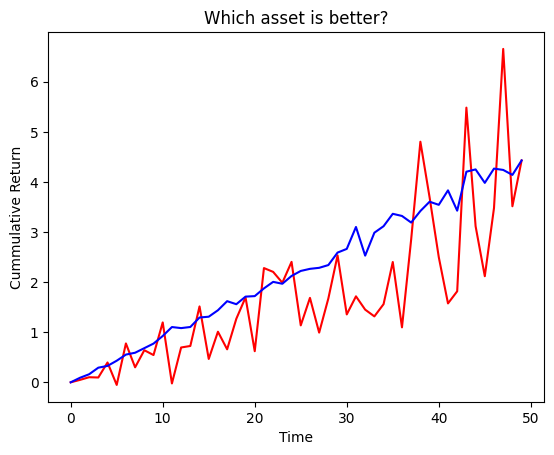

In [723]:
plt.title("Which asset is better?")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red')
plt.plot(blue, color='blue')
plt.show()

In [724]:
print(f"Red total return: {round(red[-1], 2)}%")
print(f"Blue total return: {round(blue[-1], 2)}%")

Red total return: 4.43%
Blue total return: 4.43%


In [725]:
red_sharpe = red.mean() / red.std()
blue_sharpe = blue.mean() / blue.std()

print(f"Red Sharpe: {round(red_sharpe, 2)}")
print(f"Blue Sharpe: {round(blue_sharpe, 2)}")

Red Sharpe: 1.19
Blue Sharpe: 1.67


In [726]:
num_points = 50
red_mean = .03
blue_mean = .03
green_mean = .03
red_std = 1
blue_std = .1
green_std = .01

red = generate_asset(red_mean, red_std, num_points, 1)
blue = generate_asset(blue_mean, blue_std, num_points, 2)
green = generate_asset(green_mean, green_std, num_points, 3)

blue *= red[-1] / blue[-1]
green *= red[-1] / green[-1]

In [727]:
red_sharpe = red.mean() / red.std()
blue_sharpe = blue.mean() / blue.std()
green_sharpe = green.mean() / green.std()

print(f"Red Sharpe: {round(red_sharpe, 2)}")
print(f"Blue Sharpe: {round(blue_sharpe, 2)}")
print(f"Green Sharpe: {round(green_sharpe, 2)}")

Red Sharpe: 0.81
Blue Sharpe: 1.63
Green Sharpe: 1.7


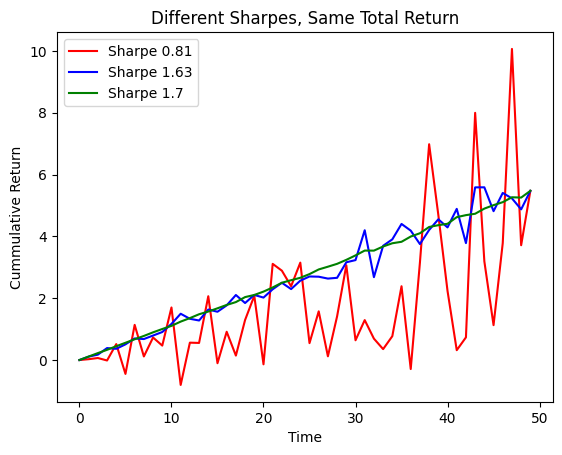

In [728]:
plt.title("Different Sharpes, Same Total Return")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red', label=f"Sharpe {round(red_sharpe,2)}")
plt.plot(blue, color='blue', label=f"Sharpe {round(blue_sharpe,2)}")
plt.plot(green, color='green', label=f"Sharpe {round(green_sharpe,2)}")
plt.legend()
plt.show()

### Diversification

In [729]:
num_points = 50
red_mean = .03
blue_mean = .03
red_std = .25
blue_std = .25

red = generate_asset(red_mean, red_std, num_points, 10)
blue = generate_asset(blue_mean, blue_std, num_points, 11)
blue *= red[-1] / blue[-1]

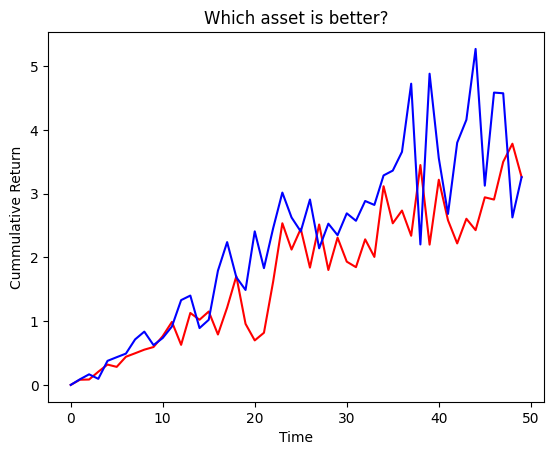

In [730]:
plt.title("Which asset is better?")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red')
plt.plot(blue, color='blue')
plt.show()

In [731]:
green = (red + blue) / 2

In [732]:
red_sharpe = red.mean() / red.std()
blue_sharpe = blue.mean() / blue.std()
green_sharpe = green.mean() / green.std()

print(f"Red Sharpe: {round(red_sharpe, 2)}")
print(f"Blue Sharpe: {round(blue_sharpe, 2)}")
print(f"Green Sharpe: {round(green_sharpe, 2)}")

Red Sharpe: 1.64
Blue Sharpe: 1.63
Green Sharpe: 1.71


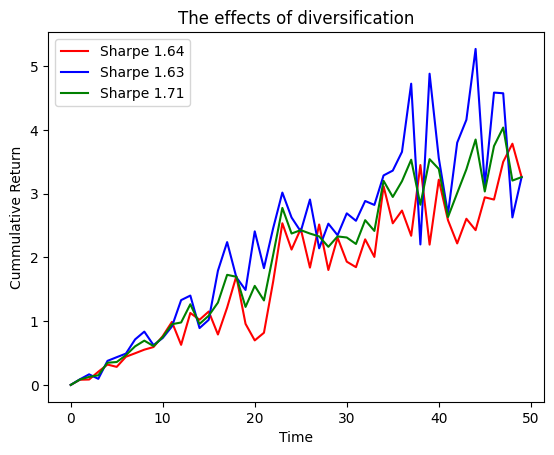

In [733]:
plt.title("The effects of diversification")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red', label=f"Sharpe {round(red_sharpe,2)}")
plt.plot(blue, color='blue', label=f"Sharpe {round(blue_sharpe,2)}")
plt.plot(green, color='green', label=f"Sharpe {round(green_sharpe,2)}")
plt.legend()
plt.show()

### Leverage

In [734]:
num_points = 50
red_mean = .03
blue_mean = .03
red_std = .5
blue_std = .05

red = generate_asset(red_mean, red_std, num_points, 1)
blue = generate_asset(blue_mean, blue_std, num_points, 2)

In [735]:
print(f"Red total return: {round(red[-1], 2)}%")
print(f"Blue total return: {round(blue[-1], 2)}%")

Red total return: 4.43%
Blue total return: 3.4%


In [736]:
red_sharpe = red.mean() / red.std()
blue_sharpe = blue.mean() / blue.std()

print(f"Red Sharpe: {round(red_sharpe, 2)}")
print(f"Blue Sharpe: {round(blue_sharpe, 2)}")

Red Sharpe: 1.19
Blue Sharpe: 1.67


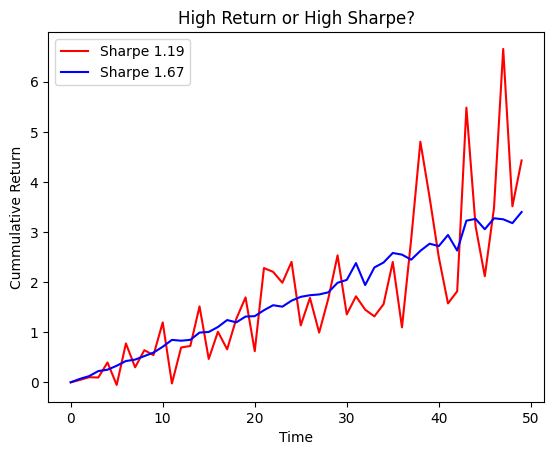

In [737]:
plt.title("High Return or High Sharpe?")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red', label=f"Sharpe {round(red_sharpe,2)}")
plt.plot(blue, color='blue', label=f"Sharpe {round(blue_sharpe,2)}")
plt.legend()
plt.show()

In [738]:
lever_2 = blue * 2
lever_3 = blue * 3

lever_2_sharpe = lever_2.mean() / lever_2.std()
lever_3_sharpe = lever_3.mean() / lever_3.std()

print(f"2 X Blue Sharpe: {round(lever_2_sharpe, 2)}")
print(f"3 X Blue Sharpe: {round(lever_3_sharpe, 2)}")

2 X Blue Sharpe: 1.67
3 X Blue Sharpe: 1.67


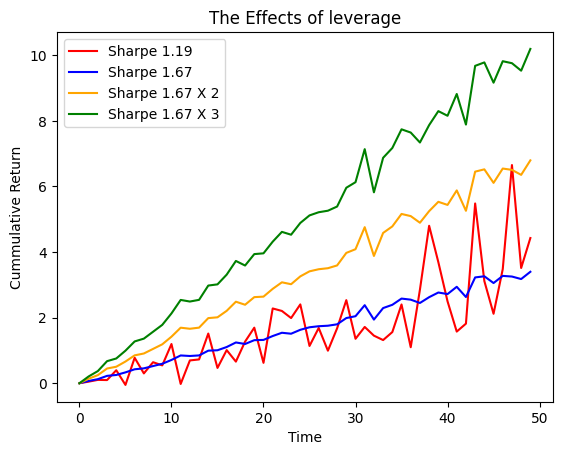

In [739]:
plt.title("The Effects of leverage")
plt.ylabel("Cummulative Return")
plt.xlabel("Time")
plt.plot(red, color='red', label=f"Sharpe {round(red_sharpe,2)}")
plt.plot(blue, color='blue', label=f"Sharpe {round(blue_sharpe,2)}")
plt.plot(lever_2, color='orange', label=f"Sharpe {round(lever_2_sharpe,2)} X 2")
plt.plot(lever_3, color='green', label=f"Sharpe {round(lever_3_sharpe,2)} X 3")
plt.legend()
plt.show()